In [1]:
greetings = "Assalam-o-Alaikum!"
print(greetings)

Assalam-o-Alaikum!


**We will be examining the performance in trial vs control stores to provide a recommendation for each location based on our insight.**

- Select control stores – explore the data and define metrics for control store selection – "What would make them a control store?" Visualize the drivers to see suitability.

- Assessment of the trial – get insights of each of the stores. Compare each trial store with ontrol store to get its overall performance. We want to know if the trial stores were successful or not.

- Collate findings – summarise findings for each store and provide recommendations to share with client outlining the impact on sales during trial period.

### Import Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Import and Explore DataSet

In [3]:
df = pd.read_csv("trial_control.csv")
df.head().T

,0,1,2,3,4
LYLTY_CARD_NBR,1000,1002,1003,1003,1004
DATE,2018-10-17,2018-09-16,2019-03-07,2019-03-08,2018-11-02
STORE_NBR,1,1,1,1,1
TXN_ID,1,2,3,4,5
PROD_NBR,5,58,52,106,96
PROD_NAME,Natural Chip Compny SeaSalt175g,Red Rock Deli Chikn&Garlic Aioli 150g,Grain Waves Sour Cream&Chives 210G,Natural ChipCo Hony Soy Chckn175g,WW Original Stacked Chips 160g
PROD_QTY,2,1,1,1,1
TOT_SALES,6,2.7,3.6,3,1.9
PACK_SIZE,175,150,210,175,160
BRAND,NATURAL,RRD,GRNWVES,NATURAL,WOOLWORTHS


**Rename Columns**

In [4]:

df = df.rename(columns = {"LYLTY_CARD_NBR": "Card No.",
                     "LIFESTAGE": "Group",
                     "PREMIUM_CUSTOMER": "Subscription",
                     "DATE": "Date", 
                     "STORE_NBR": "Store Id",
                     "TXN_ID": "Transaction Id",
                     "PROD_NBR": "Product Id",
                     "PROD_NAME": "Product",
                     "PROD_QTY": "Quantity",
                     "TOT_SALES": "Sales"})
df.head().T

,0,1,2,3,4
Card No.,1000,1002,1003,1003,1004
Date,2018-10-17,2018-09-16,2019-03-07,2019-03-08,2018-11-02
Store Id,1,1,1,1,1
Transaction Id,1,2,3,4,5
Product Id,5,58,52,106,96
Product,Natural Chip Compny SeaSalt175g,Red Rock Deli Chikn&Garlic Aioli 150g,Grain Waves Sour Cream&Chives 210G,Natural ChipCo Hony Soy Chckn175g,WW Original Stacked Chips 160g
Quantity,2,1,1,1,1
Sales,6,2.7,3.6,3,1.9
PACK_SIZE,175,150,210,175,160
BRAND,NATURAL,RRD,GRNWVES,NATURAL,WOOLWORTHS


**Date Format yyyymm**

- Client has selected store numbers 77, 86 and 88 as trial stores.
- Client wants control stores to be established stores that are operational for the entire observation period.
- Trial period = 1 Feb 2019 to 30 April 2019.
- Compare trial stores to control stores that are similar pre-trial. Similarity measurement:
    - Monthly overall sales revenue
    - Monthly number of customers
    - Monthly number of transactions per customer

In [5]:
df["Date"] = pd.to_datetime(df["Date"])
df["Year Month"] = df["Date"].dt.strftime("%Y%m").astype("int")

In [6]:
df.head().T

,0,1,2,3,4
Card No.,1000,1002,1003,1003,1004
Date,2018-10-17 00:00:00,2018-09-16 00:00:00,2019-03-07 00:00:00,2019-03-08 00:00:00,2018-11-02 00:00:00
Store Id,1,1,1,1,1
Transaction Id,1,2,3,4,5
Product Id,5,58,52,106,96
Product,Natural Chip Compny SeaSalt175g,Red Rock Deli Chikn&Garlic Aioli 150g,Grain Waves Sour Cream&Chives 210G,Natural ChipCo Hony Soy Chckn175g,WW Original Stacked Chips 160g
Quantity,2,1,1,1,1
Sales,6,2.7,3.6,3,1.9
PACK_SIZE,175,150,210,175,160
BRAND,NATURAL,RRD,GRNWVES,NATURAL,WOOLWORTHS


### Calculate Each Stores Monthly
- Total sales
- Number of customers,
- Average transactions per customer
- Average chips per customer
- Average price per unit

In [7]:
def monthly_store_metrics():
    store_year_month_group = df.groupby(["Store Id", "Year Month"])
    total_sales = store_year_month_group["Sales"].sum()
    number_of_customers = store_year_month_group["Card No."].nunique()
    average_transactions_per_customer = store_year_month_group.size() / number_of_customers
    average_chips_per_customer = store_year_month_group["Quantity"].sum() / number_of_customers
    average_chips_price_per_unit = total_sales / store_year_month_group["Quantity"].sum()
    aggregates = [total_sales, number_of_customers, average_transactions_per_customer, average_chips_per_customer, average_chips_price_per_unit]
    metrics = pd.concat(aggregates, axis = 1)
    metrics.columns = ["Sales", "Customers", "Average Transactions per Customer", "Average Chips per Customer", "Average Chips Price per Unit"]
    return metrics

**Data Information**

In [8]:
monthly_metrics = monthly_store_metrics().reset_index()
monthly_metrics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3169 entries, 0 to 3168
Data columns (total 7 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Store Id                           3169 non-null   int64  
 1   Year Month                         3169 non-null   int64  
 2   Sales                              3169 non-null   float64
 3   Customers                          3169 non-null   int64  
 4   Average Transactions per Customer  3169 non-null   float64
 5   Average Chips per Customer         3169 non-null   float64
 6   Average Chips Price per Unit       3169 non-null   float64
dtypes: float64(4), int64(3)
memory usage: 173.4 KB


### pre trial observation
- filter only stores with full 12 months observation


In [9]:
observation_counts = monthly_metrics["Store Id"].value_counts()
observation_index = observation_counts[observation_counts == 12].index
observation = monthly_metrics[monthly_metrics["Store Id"].isin(observation_index)]
pre_trial_observation = observation[observation["Year Month"] < 201902]
pre_trial_observation.head()

,Store Id,Year Month,Sales,Customers,Average Transactions per Customer,Average Chips per Customer,Average Chips Price per Unit
0,1,201807,206.9,49,1.061224,1.265306,3.337097
1,1,201808,176.1,42,1.023810,1.285714,3.261111
2,1,201809,278.8,59,1.050847,1.271186,3.717333
3,1,201810,188.1,44,1.022727,1.318182,3.243103
4,1,201811,192.6,46,1.021739,1.239130,3.378947


### Correlation

In [10]:
def correlation(metrics, store, table = pre_trial_observation):
    control_stores = table[~table["Store Id"].isin([77, 86, 88])]["Store Id"].unique()
    corrs = pd.DataFrame(columns = ["Year Month", "Trial Store", "Control Store", "Correlation Score"])
    trial_store = table[table["Store Id"] == store][metrics].reset_index()
    for control in control_stores:
        concat_df = pd.DataFrame(columns = ["Year Month", "Trial Store", "Control Store", "Correlation Score"])
        control_store = table[table["Store Id"] == control][metrics].reset_index()
        concat_df["Correlation Score"] = trial_store.corrwith(control_store, axis = 1)
        concat_df["Trial Store"] = store
        concat_df["Control Store"] = control
        concat_df["Year Month"] = list(table[table["Store Id"] == store]["Year Month"])
        corrs = pd.concat([corrs, concat_df])
    return corrs

In [11]:
corr_table = pd.DataFrame()
for trial_num in [77, 86, 88]:
    corr_table = pd.concat([corr_table, correlation(["Sales", "Customers", "Average Transactions per Customer", "Average Chips per Customer", "Average Chips Price per Unit"], trial_num)])
corr_table.head(8)

,Year Month,Trial Store,Control Store,Correlation Score
0,201807,77,1,0.070414
1,201808,77,1,0.027276
2,201809,77,1,0.002389
3,201810,77,1,-0.020045
4,201811,77,1,0.030024
5,201812,77,1,0.063946
6,201901,77,1,0.001470
0,201807,77,2,0.142957


In [12]:
def magnitude(metrics, store, table = pre_trial_observation):
    control_store_numbers = table[~table["Store Id"].isin([77, 86, 88])]["Store Id"].unique()
    dframe = pd.DataFrame()
    trial_store = table[table["Store Id"] == store][metrics]
    for control in control_store_numbers:
        concat_df = abs(table[table["Store Id"] == store].reset_index()[metrics] - table[table["Store Id"] == control].reset_index()[metrics])
        concat_df["Year Month"] = list(table[table["Store Id"] == store]["Year Month"])
        concat_df["Trial Store"] = store
        concat_df["Control Store"] = control
        dframe = pd.concat([dframe, concat_df])
    for col in metrics:
        dframe[col] = 1 - ((dframe[col] - dframe[col].min()) / (dframe[col].max() - dframe[col].min()))
    dframe["magnitude"] = dframe[metrics].mean(axis = 1)
    return dframe

In [13]:
dframe_table = pd.DataFrame()
for trial_num in [77, 86, 88]:
    dframe_table = pd.concat([dframe_table, magnitude(["Sales", "Customers", "Average Transactions per Customer", "Average Chips per Customer", "Average Chips Price per Unit"], trial_num)])
    
dframe_table.head(8)

,Sales,Customers,Average Transactions per Customer,Average Chips per Customer,Average Chips Price per Unit,Year Month,Trial Store,Control Store,magnitude
0,0.935431,0.980769,0.958035,0.739412,0.883569,201807,77,1,0.899443
1,0.942972,0.951923,0.993823,0.802894,0.886328,201808,77,1,0.915588
2,0.961503,0.836538,0.992126,0.730041,0.703027,201809,77,1,0.844647
3,0.988221,0.932692,0.989514,0.940460,0.590528,201810,77,1,0.888283
4,0.962149,0.951923,0.874566,0.730358,0.832481,201811,77,1,0.870296
5,0.944193,0.961538,0.868716,0.857966,0.770744,201812,77,1,0.880632
6,0.964375,1.000000,0.790956,0.551428,0.678728,201901,77,1,0.797098
0,0.895138,0.884615,0.933787,0.680831,0.848622,201807,77,2,0.848599


**We'll select control stores based on how similar monthly total sales in dollar amounts and monthly number of customers are to the trial stores by using correlation and magnitude distance.**

In [14]:
def combine_corr_dframe(metrics, store, table = pre_trial_observation):
    corrs = correlation(metrics, store, table)
    dframe = magnitude(metrics, store, table)
    dframe = dframe.drop(metrics, axis = 1)
    combine = pd.merge(corrs, dframe, on = ["Year Month", "Trial Store", "Control Store"])
    return combine

In [15]:
compare_metrics_table1 = pd.DataFrame()
for trial_num in [77, 86, 88]:
    compare_metrics_table1 = pd.concat([compare_metrics_table1, combine_corr_dframe(["Sales"], trial_num)])

In [16]:
corr_weight = 0.5
dist_weight = 1 - corr_weight

**Top 5 highest Composite Score for each Trial Store based on TOT_SALES**

In [17]:
grouped_comparison_table1 = compare_metrics_table1.groupby(["Trial Store", "Control Store"]).mean().reset_index()
grouped_comparison_table1["Composite Score"] = (corr_weight * grouped_comparison_table1["Correlation Score"]) + (dist_weight * grouped_comparison_table1["magnitude"])
for trial_num in compare_metrics_table1["Trial Store"].unique():
    print(grouped_comparison_table1[grouped_comparison_table1["Trial Store"] == trial_num].sort_values(ascending = False, by = "Composite Score").head(), "\n")   

     Trial Store  Control Store  Correlation Score  magnitude  Composite Score
218           77            233                1.0   0.986477         0.993238
239           77            255                1.0   0.979479         0.989739
177           77            188                1.0   0.977663         0.988831
49            77             53                1.0   0.976678         0.988339
120           77            131                1.0   0.976267         0.988134 

     Trial Store  Control Store  Correlation Score  magnitude  Composite Score
356           86            109                1.0   0.966783         0.983391
401           86            155                1.0   0.965876         0.982938
464           86            222                1.0   0.962280         0.981140
467           86            225                1.0   0.960512         0.980256
471           86            229                1.0   0.951704         0.975852 

     Trial Store  Control Store  Correlation Sco

In [18]:
compare_metrics_table2 = pd.DataFrame()
for trial_num in [77, 86, 88]:
    compare_metrics_table2 = pd.concat([compare_metrics_table2, combine_corr_dframe(["Customers"], trial_num)])

**Top 5 highest Composite Score for each Trial Store based on Customers**

In [19]:
grouped_comparison_table2 = compare_metrics_table2.groupby(["Trial Store", "Control Store"]).mean().reset_index()
grouped_comparison_table2["Composite Score"] = (corr_weight * grouped_comparison_table2["Correlation Score"]) + (dist_weight * grouped_comparison_table2["magnitude"])
for trial_num in compare_metrics_table2["Trial Store"].unique():
    print(grouped_comparison_table2[grouped_comparison_table2["Trial Store"] == trial_num].sort_values(ascending = False, by = "Composite Score").head(), "\n")

     Trial Store  Control Store  Correlation Score  magnitude  Composite Score
218           77            233                1.0   0.993132         0.996566
38            77             41                1.0   0.976648         0.988324
101           77            111                1.0   0.968407         0.984203
105           77            115                1.0   0.967033         0.983516
15            77             17                1.0   0.965659         0.982830 

     Trial Store  Control Store  Correlation Score  magnitude  Composite Score
401           86            155                1.0   0.986772         0.993386
467           86            225                1.0   0.969577         0.984788
356           86            109                1.0   0.969577         0.984788
471           86            229                1.0   0.964286         0.982143
293           86             39                1.0   0.961640         0.980820 

     Trial Store  Control Store  Correlation Sco

In [20]:
for trial_num in compare_metrics_table2["Trial Store"].unique():
    a = grouped_comparison_table1[grouped_comparison_table1["Trial Store"] == trial_num].sort_values(ascending = False, by = "Composite Score").set_index(["Trial Store", "Control Store"])["Composite Score"]
    b = grouped_comparison_table2[grouped_comparison_table2["Trial Store"] == trial_num].sort_values(ascending = False, by = "Composite Score").set_index(["Trial Store", "Control Store"])["Composite Score"]
    print((pd.concat([a, b], axis = 1).sum(axis = 1) / 2).sort_values(ascending = False).head(3), "\n")

Trial Store  Control Store
77           233              0.994902
             41               0.986020
             46               0.984762
dtype: float64 

Trial Store  Control Store
86           155              0.988162
             109              0.984090
             225              0.982522
dtype: float64 

Trial Store  Control Store
88           40               0.970895
             26               0.958929
             72               0.954079
dtype: float64 



**Top 3 similarity based on Sales:**

- Trial store 77: Store 233, 255, 188
- Trial store 86: Store 109, 155, 222
- Trial store 88: Store 40, 26, 72

**Top 3 similartiy based on Customers:**

- Trial store 77: Store 233, 41, 111
- Trial store 86: Store 155, 225, 109
- Trial store 88: Store 237, 203, 40

**Based on highest average of both features combined:**

- Trial store 77: Store 233
- Trial store 86: Store 155
- Trial store 88: Store 40

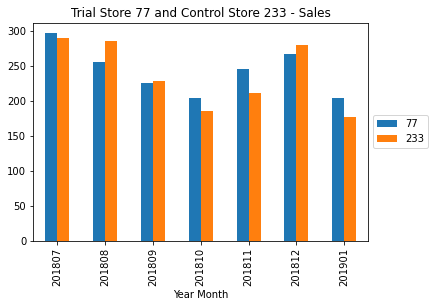

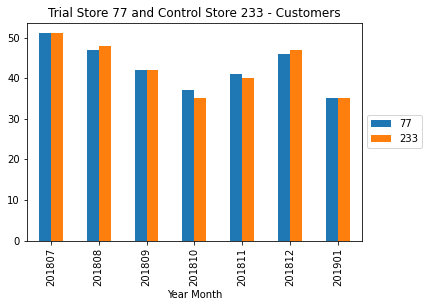

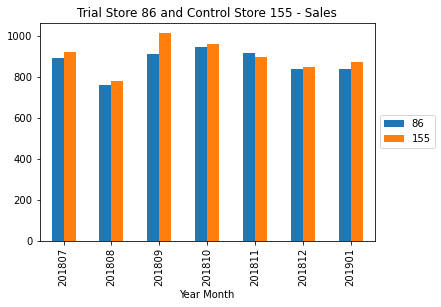

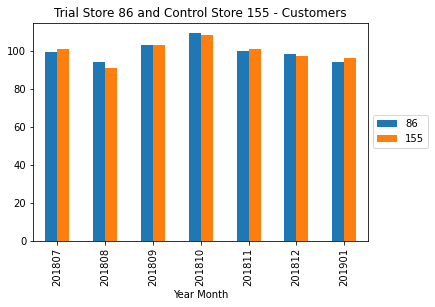

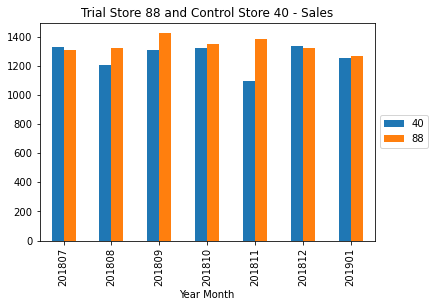

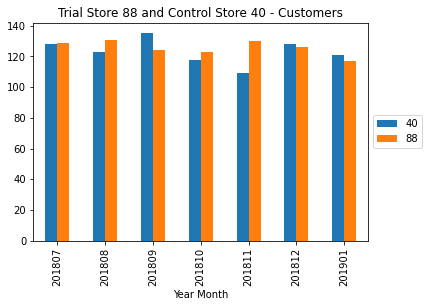

In [21]:
trial_control = {77:233, 86:155, 88:40}
for key, val in trial_control.items():
    pre_trial_observation[pre_trial_observation["Store Id"].isin([key, val])].groupby(["Year Month", "Store Id"]).sum()["Sales"].unstack().plot.bar()
    plt.legend(loc = "center left", bbox_to_anchor = (1.0, 0.5))
    plt.title("Trial Store " + str(key) + " and Control Store " + str(val) + " - Sales")
    plt.show()
    pre_trial_observation[pre_trial_observation["Store Id"].isin([key, val])].groupby(["Year Month", "Store Id"]).sum()["Customers"].unstack().plot.bar()
    plt.legend(loc = "center left", bbox_to_anchor = (1.0, 0.5))
    plt.title("Trial Store " + str(key) + " and Control Store " + str(val) + " - Customers")
    plt.show()
    print("\n\n")

**Next we'll compare the performance of Trial stores to Control stores during the trial period. To ensure their performance is comparable during Trial period, we need to scale (multiply to ratio of trial / control) all of Control stores' performance to Trial store's performance during pre-trial. Starting with TOT_SALES.**

In [22]:
# Ratio of Store 77 and its Control store.
sales_ratio_77 = pre_trial_observation[pre_trial_observation["Store Id"] == 77]["Sales"].sum() / pre_trial_observation[pre_trial_observation["Store Id"] == 233]["Sales"].sum()

# Ratio of Store 86 and its Control store.
sales_ratio_86 = pre_trial_observation[pre_trial_observation["Store Id"] == 86]["Sales"].sum() / pre_trial_observation[pre_trial_observation["Store Id"] == 155]["Sales"].sum()

# Ratio of Store 88 and its Control store.
sales_ratio_88 = pre_trial_observation[pre_trial_observation["Store Id"] == 88]["Sales"].sum() / pre_trial_observation[pre_trial_observation["Store Id"] == 40]["Sales"].sum()

In [23]:
trial_observation = observation[(observation["Year Month"] >= 201902) & (observation["Year Month"] <= 201904)]
scaled_sales_control_stores = observation[observation["Store Id"].isin([233, 155, 40])][["Store Id", "Year Month", "Sales"]]
def scalar(row):
    if row["Store Id"] == 233:
        return row["Sales"] * sales_ratio_77
    
    elif row["Store Id"] == 155:
        return row["Sales"] * sales_ratio_86
    
    elif row["Store Id"] == 40:
        return row["Sales"] * sales_ratio_88

scaled_sales_control_stores["Scaled Sales"] = scaled_sales_control_stores.apply(lambda row: scalar(row), axis = 1)
trial_scaled_sales_control_stores = scaled_sales_control_stores[(scaled_sales_control_stores["Year Month"] >= 201902) & (scaled_sales_control_stores["Year Month"] <= 201904)]
pre_trial_scaled_sales_control_stores = scaled_sales_control_stores[scaled_sales_control_stores["Year Month"] < 201902]

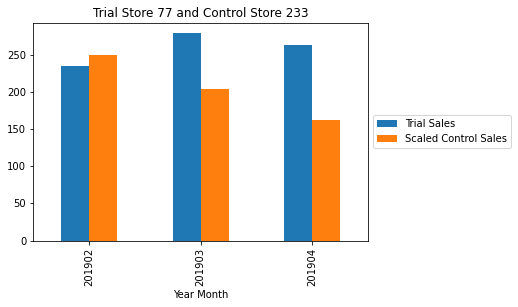

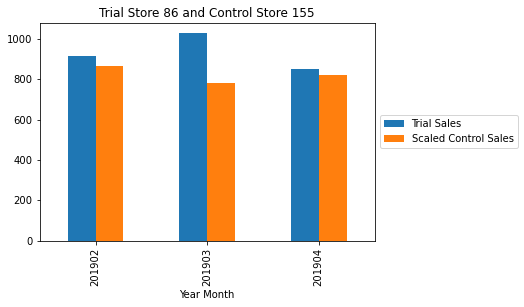

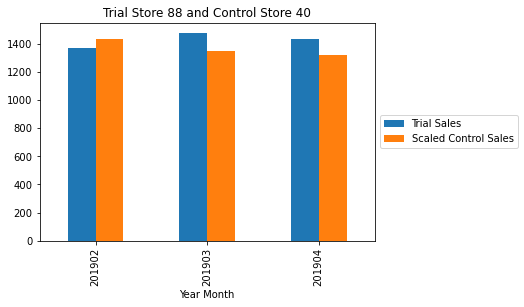

In [24]:
percentage_diff = {}

for trial, control in trial_control.items():
    a = trial_scaled_sales_control_stores[trial_scaled_sales_control_stores["Store Id"] == control]
    b = trial_observation[trial_observation["Store Id"] == trial][["Store Id", "Year Month", "Sales"]]
    percentage_diff[trial] = b["Sales"].sum() / a["Sales"].sum()
    b[["Year Month", "Sales"]].merge(a[["Year Month", "Scaled Sales"]],on="Year Month").set_index("Year Month").rename(columns={"Scaled Sales":"Scaled Control Sales", "Sales":"Trial Sales"}).plot.bar()
    plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
    plt.title("Trial Store "+str(trial)+" and Control Store "+str(control))

**Creating a compiled percentage_difference table**

In [25]:
temp1 = scaled_sales_control_stores.sort_values(by = ["Store Id", "Year Month"], ascending = [False, True]).reset_index().drop(["Sales", "index"], axis = 1)
temp2 = observation[observation["Store Id"].isin([77, 86, 88])][["Store Id", "Year Month", "Sales"]].reset_index().drop(["index", "Year Month"], axis = 1)
scaledsales_vs_trial = pd.concat([temp1, temp2], axis = 1)
scaledsales_vs_trial.columns = ["Control Store Id", "Year Month", "Control Scaled Sales", "Trial Store Id", "Trial Sales"]
scaledsales_vs_trial["Sales Percentage Diff"] = (scaledsales_vs_trial["Trial Sales"] - scaledsales_vs_trial["Control Scaled Sales"]) / (((scaledsales_vs_trial["Trial Sales"] + scaledsales_vs_trial["Control Scaled Sales"])/2))
def label_period(cell):
    if cell < 201902:
        return "pre"
    elif cell > 201904:
        return "post"
    else:
        return "trial"

scaledsales_vs_trial["Trial Period"] = scaledsales_vs_trial["Year Month"].apply(lambda cell: label_period(cell))
scaledsales_vs_trial[scaledsales_vs_trial["Trial Period"] == "trial"]

,Control Store Id,Year Month,Control Scaled Sales,Trial Store Id,Trial Sales,Sales Percentage Diff,Trial Period
7,233,201902,249.762622,77,235.0,-0.060907,trial
8,233,201903,203.802205,77,278.5,0.309755,trial
9,233,201904,162.345704,77,263.5,0.475075,trial
19,155,201902,864.522060,86,913.2,0.054764,trial
20,155,201903,780.320405,86,1026.8,0.272787,trial
21,155,201904,819.317024,86,848.2,0.034642,trial
31,40,201902,1434.399269,88,1370.2,-0.045781,trial
32,40,201903,1352.064709,88,1477.2,0.088458,trial
33,40,201904,1321.797762,88,1439.4,0.085182,trial



Check significance of Trial minus Control stores TOT_SALES Percentage Difference Pre-Trial vs Trial.

- Step 1: Check null hypothesis of 0 difference between control store's Pre-Trial and Trial period performance.

- Step 2: Proof control and trial stores are similar statistically

    - Check p-value of control store's Pre-Trial vs Trial store's Pre-Trial.
    - If <5%, it is significantly different. If >5%, it is not significantly different (similar).

- Step 3: After checking Null Hypothesis of first 2 step to be true, we can check Null Hypothesis of Percentage
    Difference between Trial and Control stores during pre-trial is the same as during trial.

    - Check T-Value of Percentage Difference of each Trial month (Feb, March, April 2019).
    - Mean is mean of Percentage Difference during pre-trial.
    - Standard deviation is stdev of Percentage Difference during pre-trial.
    - Formula is Trial month's Percentage Difference minus Mean, divided by Standard deviation.
    - Compare each T-Value with 95% percentage significance critical t-value of 6 degrees of freedom (7 months of sample - 1)

In [26]:
from scipy.stats import ttest_ind, t
# Step 1
for num in [40, 155, 233]:
    print("Store", num)
    print(ttest_ind(pre_trial_scaled_sales_control_stores[pre_trial_scaled_sales_control_stores["Store Id"] == num]["Scaled Sales"], trial_scaled_sales_control_stores[trial_scaled_sales_control_stores["Store Id"] == num]["Scaled Sales"], equal_var = False), "\n")
    
alpha = 0.05
print("Critical t-value for 95% confidence interval:")
print(t.ppf((alpha/2, 1-alpha/2), df=min([len(pre_trial_scaled_sales_control_stores[pre_trial_scaled_sales_control_stores["Store Id"] == num]),
                       len(trial_scaled_sales_control_stores[trial_scaled_sales_control_stores["Store Id"] == num])])-1))

Store 40
Ttest_indResult(statistic=-0.5958372343168585, pvalue=0.5722861621434009) 

Store 155
Ttest_indResult(statistic=1.429195687929098, pvalue=0.19727058651603258) 

Store 233
Ttest_indResult(statistic=1.1911026010974504, pvalue=0.29445006064862156) 

Critical t-value for 95% confidence interval:
[-4.30265273  4.30265273]


In [27]:
a = pre_trial_scaled_sales_control_stores[pre_trial_scaled_sales_control_stores["Store Id"] == 40]["Scaled Sales"]
b = trial_scaled_sales_control_stores[trial_scaled_sales_control_stores["Store Id"] == 40]["Scaled Sales"]

**Null hypothesis is true. There isn't any statistically significant difference between control store's scaled Pre-Trial and Trial period sales.**

In [28]:
# Step 2
for trial, cont in trial_control.items():
    print("Trial store:", trial, ", Control store:", cont)
    print(ttest_ind(pre_trial_observation[pre_trial_observation["Store Id"] == trial]["Sales"],
                   pre_trial_scaled_sales_control_stores[pre_trial_scaled_sales_control_stores["Store Id"] == cont]["Scaled Sales"],
                   equal_var=True), '\n')
    #print(len(pretrial_full_observ[pretrial_full_observ["STORE_NBR"] == trial]["TOT_SALES"]),len(pretrial_scaled_sales_control_stores[pretrial_scaled_sales_control_stores["STORE_NBR"] == cont]["ScaledSales"]))

alpha = 0.05
print("Critical t-value for 95% confidence interval:")
print(t.ppf((alpha/2, 1-alpha/2), df=len(pre_trial_observation[pre_trial_observation["Store Id"] == trial])-1))

Trial store: 77 , Control store: 233
Ttest_indResult(statistic=-1.2533353315065926e-15, pvalue=0.999999999999999) 

Trial store: 86 , Control store: 155
Ttest_indResult(statistic=0.0, pvalue=1.0) 

Trial store: 88 , Control store: 40
Ttest_indResult(statistic=0.0, pvalue=1.0) 

Critical t-value for 95% confidence interval:
[-2.44691185  2.44691185]


**Null hypothesis is true. There isn't any statistically significant difference between Trial store's sales and Control store's scaled-sales performance during pre-trial.**

In [29]:
# Step 3
for trial, cont in trial_control.items():
    print("Trial store:", trial, ", Control store:", cont)
    temp_pre = scaledsales_vs_trial[(scaledsales_vs_trial["Control Store Id"] == cont) & (scaledsales_vs_trial["Trial Period"]=="pre")]
    std = temp_pre["Sales Percentage Diff"].std()
    mean = temp_pre["Sales Percentage Diff"].mean()
    #print(std, mean)
    
    for t_month in scaledsales_vs_trial[scaledsales_vs_trial["Trial Period"] == "trial"]["Year Month"].unique():
        pdif = scaledsales_vs_trial[(scaledsales_vs_trial["Year Month"] == t_month) & (scaledsales_vs_trial["Trial Store Id"] == trial)]["Sales Percentage Diff"]
        print(t_month,":",(float(pdif)-mean)/std)
    print('\n')
    
print("Critical t-value for 95% confidence interval:")
conf_intv_95 = t.ppf(0.95, df=len(temp_pre)-1)
print(conf_intv_95)

Trial store: 77 , Control store: 233
201902 : -0.7171038288055888
201903 : 3.035317928855662
201904 : 4.708944418758203


Trial store: 86 , Control store: 155
201902 : 1.4133618775921797
201903 : 7.123063846042149
201904 : 0.8863824572944162


Trial store: 88 , Control store: 40
201902 : -0.5481633746817604
201903 : 1.0089992743637755
201904 : 0.9710006270463645


Critical t-value for 95% confidence interval:
1.9431802803927816



**There are 3 months' increase in performance that are statistically significant (Above the 95% confidence interval t-score):**

- March and April trial months for trial store 77
- March trial months for trial store 86


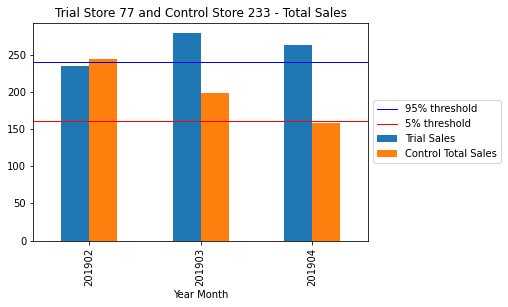

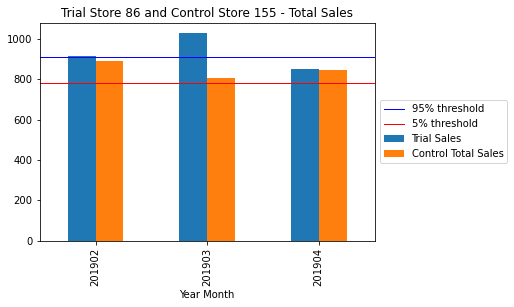

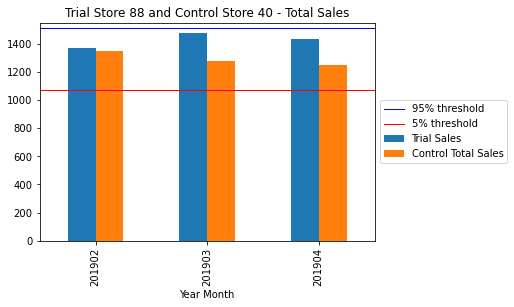

In [30]:
for trial, control in trial_control.items():
    a = trial_scaled_sales_control_stores[trial_scaled_sales_control_stores["Store Id"] == control].rename(columns={"Sales": "Control Total Sales"})
    b = trial_observation[trial_observation["Store Id"] == trial][["Store Id", "Year Month", "Sales"]].rename(columns={"Sales": "Trial Sales"})
    comb = b[["Year Month", "Trial Sales"]].merge(a[["Year Month", "Control Total Sales"]],on="Year Month").set_index("Year Month")
    comb.plot.bar()
    cont_sc_sales = trial_scaled_sales_control_stores[trial_scaled_sales_control_stores["Store Id"] == control]["Sales"]
    std = scaledsales_vs_trial[(scaledsales_vs_trial["Control Store Id"] == control) & (scaledsales_vs_trial["Trial Period"]=="pre")]["Sales Percentage Diff"].std()
    thresh95 = cont_sc_sales.mean() + (cont_sc_sales.mean() * std * 2)
    thresh5 = cont_sc_sales.mean() - (cont_sc_sales.mean() * std * 2)
    plt.axhline(y=thresh95,linewidth=1, color='b', label="95% threshold")
    plt.axhline(y=thresh5,linewidth=1, color='r', label="5% threshold")
    plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
    plt.title("Trial Store "+str(trial)+" and Control Store "+str(control)+" - Total Sales")
    plt.savefig("TS {} and CS {} - TOT_SALES.png".format(trial,control), bbox_inches="tight")

**We can see that Trial store 77 sales for March and April exceeds 95% threshold of control store. Same goes to store 86 sales for March.**

In [31]:
#Ratio of Store 77 and its Control store.
ncust_ratio_77 = pre_trial_observation[pre_trial_observation["Store Id"] == 77]["Customers"].sum() / pre_trial_observation[pre_trial_observation["Store Id"] == 233]["Customers"].sum()

#Ratio of Store 86 and its Control store.
ncust_ratio_86 = pre_trial_observation[pre_trial_observation["Store Id"] == 86]["Customers"].sum() / pre_trial_observation[pre_trial_observation["Store Id"] == 155]["Customers"].sum()

#Ratio of Store 88 and its Control store.
ncust_ratio_88 = pre_trial_observation[pre_trial_observation["Store Id"] == 88]["Customers"].sum() / pre_trial_observation[pre_trial_observation["Store Id"] == 40]["Customers"].sum()

In [32]:
scaled_ncust_control_stores = observation[observation["Store Id"].isin([233, 155, 40])][["Store Id", "Year Month", "Customers"]]

def scaler_c(row):
    if row["Store Id"] == 233:
        return row["Customers"] * ncust_ratio_77
    elif row["Store Id"] == 155:
        return row["Customers"] * ncust_ratio_86
    elif row["Store Id"] == 40:
        return row["Customers"] * ncust_ratio_88

scaled_ncust_control_stores["ScaledNcust"] = scaled_ncust_control_stores.apply(lambda row: scaler_c(row), axis=1)
trial_scaled_ncust_control_stores = scaled_ncust_control_stores[(scaled_ncust_control_stores["Year Month"] >= 201902) & (scaled_ncust_control_stores["Year Month"] <= 201904)]
pretrial_scaled_ncust_control_stores = scaled_ncust_control_stores[scaled_ncust_control_stores["Year Month"] < 201902]

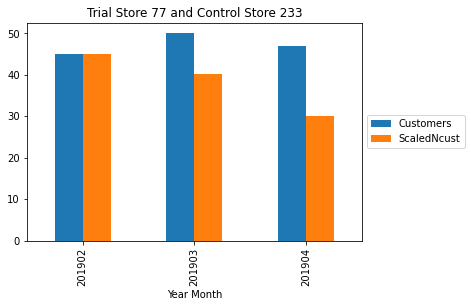

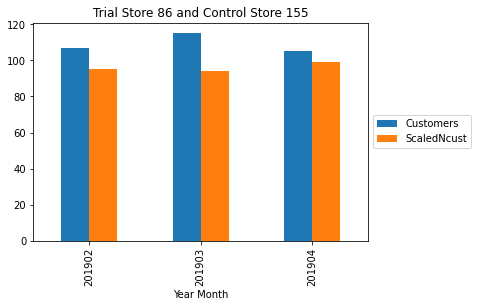

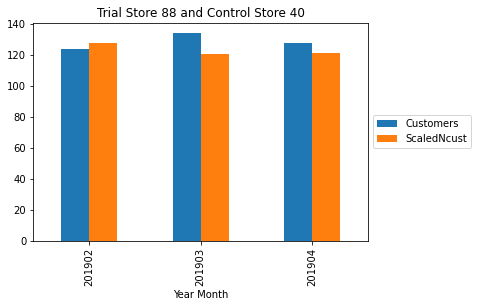

In [33]:
ncust_percentage_diff = {}
for trial, control in trial_control.items():
    a = trial_scaled_ncust_control_stores[trial_scaled_ncust_control_stores["Store Id"] == control]
    b = trial_observation[trial_observation["Store Id"] == trial][["Store Id", "Year Month", "Customers"]]
    ncust_percentage_diff[trial] = b["Customers"].sum() / a["ScaledNcust"].sum()
    b[["Year Month", "Customers"]].merge(a[["Year Month", "ScaledNcust"]],on="Year Month").set_index("Year Month").rename(columns={"Scaled Sales":"Scaled Control Customers", "Sales":"Trial Customers"}).plot.bar()
    plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
    plt.title("Trial Store "+str(trial)+" and Control Store "+str(control))

In [34]:
#Creating a compiled Xustomers Percentage Difference Table
temp1 = scaled_ncust_control_stores.sort_values(by=["Store Id", "Year Month"], ascending=[False, True]).reset_index().drop(["Customers", "index"], axis=1)
temp2 = observation[observation["Store Id"].isin([77,86,88])][["Store Id", "Year Month", "Customers"]].reset_index().drop(["index", "Year Month"], axis=1)
scaledncust_vs_trial = pd.concat([temp1, temp2], axis=1)
scaledncust_vs_trial.columns = ["Control Store Id", "Year Month", "Control Scaled Customers", "Trial Store Id", "Trial Customers"]
scaledncust_vs_trial["Customers Percentage Diff"] = (scaledncust_vs_trial["Trial Customers"] - scaledncust_vs_trial["Control Scaled Customers"]) / (((scaledncust_vs_trial["Trial Customers"] + scaledncust_vs_trial["Control Scaled Customers"])/2))
scaledncust_vs_trial["Trial Period"] = scaledncust_vs_trial["Year Month"].apply(lambda cell: label_period(cell))
scaledncust_vs_trial[scaledncust_vs_trial["Trial Period"] == "trial"]

,Control Store Id,Year Month,Control Scaled Customers,Trial Store Id,Trial Customers,Customers Percentage Diff,Trial Period
7,233,201902,45.151007,77,45,-0.003350,trial
8,233,201903,40.134228,77,50,0.218913,trial
9,233,201904,30.100671,77,47,0.438370,trial
19,155,201902,95.000000,86,107,0.118812,trial
20,155,201903,94.000000,86,115,0.200957,trial
21,155,201904,99.000000,86,105,0.058824,trial
31,40,201902,127.610209,88,124,-0.028697,trial
32,40,201903,120.464037,88,134,0.106388,trial
33,40,201904,121.484919,88,128,0.052228,trial


**Check significance of Trial minus Control stores nCustomers Percentage Difference Pre-Trial vs Trial.**

- Step 1: Check null hypothesis of 0 difference between control store's Pre-Trial and Trial period performance.
- Step 2: Proof control and trial stores are similar statistically
- Step 3: After checking Null Hypothesis of first 2 step to be true, we can check Null Hypothesis of Percentage Difference between Trial and Control stores during pre-trial is the same as during trial.

In [35]:
# Step 1
for num in [40, 155, 233]:
    print("Store", num)
    print(ttest_ind(pretrial_scaled_ncust_control_stores[pretrial_scaled_ncust_control_stores["Store Id"] == num]["ScaledNcust"],
                   trial_scaled_ncust_control_stores[trial_scaled_ncust_control_stores["Store Id"] == num]["ScaledNcust"],
                   equal_var=False), '\n')
    
alpha = 0.05
print("Critical t-value for 95% confidence interval:")
print(t.ppf((alpha/2, 1-alpha/2), df=min([len(pretrial_scaled_ncust_control_stores[pretrial_scaled_ncust_control_stores["Store Id"] == num]),
                       len(trial_scaled_ncust_control_stores[trial_scaled_ncust_control_stores["Store Id"] == num])])-1))

Store 40
Ttest_indResult(statistic=0.644732693420032, pvalue=0.5376573016017127) 

Store 155
Ttest_indResult(statistic=1.3888888888888882, pvalue=0.204345986327886) 

Store 233
Ttest_indResult(statistic=0.8442563765225701, pvalue=0.4559280037660254) 

Critical t-value for 95% confidence interval:
[-4.30265273  4.30265273]


In [36]:
# Step 2
for trial, cont in trial_control.items():
    print("Trial store:", trial, ", Control store:", cont)
    print(ttest_ind(pre_trial_observation[pre_trial_observation["Store Id"] == trial]["Customers"],
                   pretrial_scaled_ncust_control_stores[pretrial_scaled_ncust_control_stores["Store Id"] == cont]["ScaledNcust"],
                   equal_var=True), '\n')


alpha = 0.05
print("Critical t-value for 95% confidence interval:")
print(t.ppf((alpha/2, 1-alpha/2), df=len(pre_trial_observation[pre_trial_observation["Store Id"] == trial])-1))

Trial store: 77 , Control store: 233
Ttest_indResult(statistic=0.0, pvalue=1.0) 

Trial store: 86 , Control store: 155
Ttest_indResult(statistic=0.0, pvalue=1.0) 

Trial store: 88 , Control store: 40
Ttest_indResult(statistic=-7.648483953264653e-15, pvalue=0.999999999999994) 

Critical t-value for 95% confidence interval:
[-2.44691185  2.44691185]


In [37]:
# Step 3
for trial, cont in trial_control.items():
    print("Trial store:", trial, ", Control store:", cont)
    temp_pre = scaledncust_vs_trial[(scaledncust_vs_trial["Control Store Id"] == cont) & (scaledncust_vs_trial["Trial Period"]=="pre")]
    std = temp_pre["Customers Percentage Diff"].std()
    mean = temp_pre["Customers Percentage Diff"].mean()
    #print(std, mean)
    for t_month in scaledncust_vs_trial[scaledncust_vs_trial["Trial Period"] == "trial"]["Year Month"].unique():
        pdif = scaledncust_vs_trial[(scaledncust_vs_trial["Year Month"] == t_month) & (scaledncust_vs_trial["Trial Store Id"] == trial)]["Customers Percentage Diff"]
        print(t_month,":",(float(pdif)-mean)/std)
    print('\n')
    
print("Critical t-value for 95% confidence interval:")
conf_intv_95 = t.ppf(0.95, df=len(temp_pre)-1)
print(conf_intv_95)

Trial store: 77 , Control store: 233
201902 : -0.19886295797440687
201903 : 8.009609025380932
201904 : 16.114474772873923


Trial store: 86 , Control store: 155
201902 : 6.220524882227514
201903 : 10.52599074274189
201904 : 3.0763575852842706


Trial store: 88 , Control store: 40
201902 : -0.3592881735131531
201903 : 1.2575196020616801
201904 : 0.6092905590514273


Critical t-value for 95% confidence interval:
1.9431802803927816


**There are 5 months' increase in performance that are statistically significant (Above the 95% confidence interval t-score):**

- March and April trial months for trial store 77
- Feb, March and April trial months for trial store 86

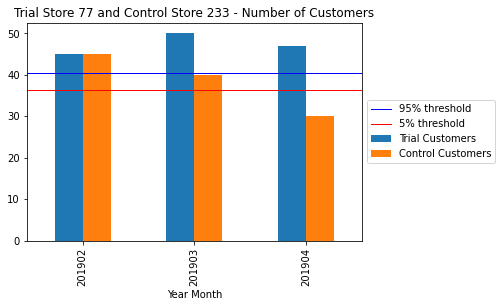

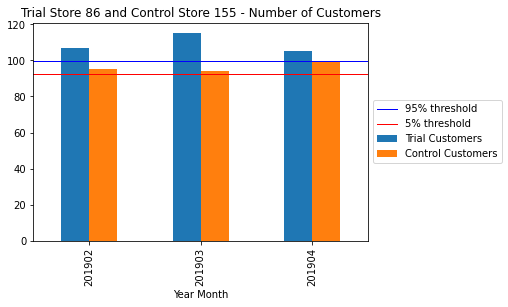

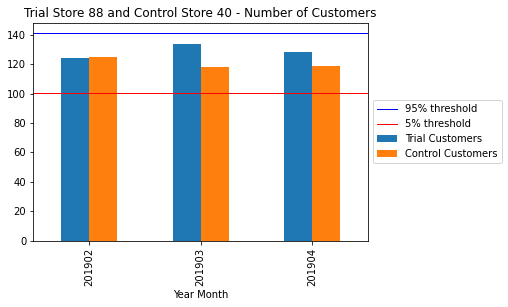

In [38]:
for trial, control in trial_control.items():
    a = trial_scaled_ncust_control_stores[trial_scaled_ncust_control_stores["Store Id"] == control].rename(columns={"Customers": "Control Customers"})
    b = trial_observation[trial_observation["Store Id"] == trial][["Store Id", "Year Month", "Customers"]].rename(columns={"Customers": "Trial Customers"})
    comb = b[["Year Month", "Trial Customers"]].merge(a[["Year Month", "Control Customers"]],on="Year Month").set_index("Year Month")
    comb.plot.bar()
    cont_sc_ncust = trial_scaled_ncust_control_stores[trial_scaled_ncust_control_stores["Store Id"] == control]["Customers"]
    std = scaledncust_vs_trial[(scaledncust_vs_trial["Control Store Id"] == control) & (scaledncust_vs_trial["Trial Period"]=="pre")]["Customers Percentage Diff"].std()
    thresh95 = cont_sc_ncust.mean() + (cont_sc_ncust.mean() * std * 2)
    thresh5 = cont_sc_ncust.mean() - (cont_sc_ncust.mean() * std * 2)
    plt.axhline(y=thresh95,linewidth=1, color='b', label="95% threshold")
    plt.axhline(y=thresh5,linewidth=1, color='r', label="5% threshold")
    plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
    plt.title("Trial Store "+str(trial)+" and Control Store "+str(control)+" - Number of Customers")
    plt.savefig("TS {} and CS {} - nCustomers.png".format(trial,control), bbox_inches="tight")

**We can see that Trial store 77 sales for Feb, March, and April exceeds 95% threshold of control store. Same goes to store 86 sales for all 3 trial months.**

- Trial store 77: Control store 233
- Trial store 86: Control store 155
- Trial store 88: Control store 40
- Both trial store 77 and 86 showed significant increase in Total Sales and Number of Customers during trial period. But not for trial store 88. Perhaps the client knows if there's anything about trial 88 that differs it from the other two trial.
- Overall the trial showed positive significant result.**